In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
training_data_path = r'C:\Users\jodge\Documents\School\Summer24\tinyml_contest_data_training'
filenames = os.listdir(training_data_path)

In [13]:
from collections import defaultdict
patients = defaultdict(int)
labels = defaultdict(set)

for fi in filenames:
    parts = fi.split('-')
    patient_num = parts[0][1:]
    patients[patient_num] += 1
    labels[patient_num].add(parts[1])
patients, labels

(defaultdict(int,
             {'01': 211,
              '02': 311,
              '04': 265,
              '05': 219,
              '06': 676,
              '07': 316,
              '08': 408,
              '09': 125,
              '10': 452,
              '12': 209,
              '13': 50,
              '15': 949,
              '16': 107,
              '17': 237,
              '18': 665,
              '19': 173,
              '20': 1159,
              '21': 263,
              '23': 219,
              '24': 244,
              '25': 534,
              '26': 893,
              '27': 298,
              '28': 499,
              '29': 441,
              '30': 360,
              '31': 207,
              '32': 174,
              '34': 253,
              '35': 920,
              '36': 226,
              '37': 262,
              '40': 226,
              '41': 232,
              '43': 186,
              '44': 555,
              '45': 300,
              '46': 600,
              '48': 694,
       

In [3]:
# drive.mount('/content/drive')
# dir_path = r'/content/drive/My Drive/School/UTSA/Tiny ML on IoT/tinyml_contest_data_training'
# directory_files = os.listdir(dir_path)
# for f in directory_files[:5]:
#   file_path = os.path.join(dir_path, f)
#   reader = pd.read_csv(file_path, sep = " ", header = None)
#   print(f, reader.head(3))

In [6]:
data_indices_dir = r'C:\Users\jodge\Documents\School\Summer24\tinymlcontest2022_demo_example\data_indices'
files = os.listdir(data_indices_dir)
files

['test_indice.csv', 'train_indice.csv']

In [7]:
for fi in files:
    path = os.path.join(data_indices_dir, fi)
    df = pd.read_csv(path)
    #print(df.head())
    sum = np.sum(df.label)
    print(fi, sum, len(df.label))

test_indice.csv 2389 5625
train_indice.csv 11837 24588


In [46]:
from torchinfo import summary
from model_1_avgpoolinfo import IEGMNet

model = IEGMNet()
batch_size = 32
summary(model, input_size=(batch_size, 1, 1250, 1))

Layer (type:depth-idx)                   Output Shape              Param #
IEGMNet                                  [32, 2]                   --
├─Sequential: 1-1                        [32, 3, 623, 1]           --
│    └─Conv2d: 2-1                       [32, 3, 623, 1]           21
│    └─ReLU: 2-2                         [32, 3, 623, 1]           --
│    └─BatchNorm2d: 2-3                  [32, 3, 623, 1]           6
├─Sequential: 1-2                        [32, 5, 310, 1]           --
│    └─Conv2d: 2-4                       [32, 5, 310, 1]           80
│    └─ReLU: 2-5                         [32, 5, 310, 1]           --
│    └─BatchNorm2d: 2-6                  [32, 5, 310, 1]           10
├─Sequential: 1-3                        [32, 10, 154, 1]          --
│    └─Conv2d: 2-7                       [32, 10, 154, 1]          210
│    └─ReLU: 2-8                         [32, 10, 154, 1]          --
│    └─BatchNorm2d: 2-9                  [32, 10, 154, 1]          20
├─Sequential: 1

In [47]:
summary(model, input_size=(batch_size, 1, 250, 1))

Layer (type:depth-idx)                   Output Shape              Param #
IEGMNet                                  [32, 2]                   --
├─Sequential: 1-1                        [32, 3, 123, 1]           --
│    └─Conv2d: 2-1                       [32, 3, 123, 1]           21
│    └─ReLU: 2-2                         [32, 3, 123, 1]           --
│    └─BatchNorm2d: 2-3                  [32, 3, 123, 1]           6
├─Sequential: 1-2                        [32, 5, 60, 1]            --
│    └─Conv2d: 2-4                       [32, 5, 60, 1]            80
│    └─ReLU: 2-5                         [32, 5, 60, 1]            --
│    └─BatchNorm2d: 2-6                  [32, 5, 60, 1]            10
├─Sequential: 1-3                        [32, 10, 29, 1]           --
│    └─Conv2d: 2-7                       [32, 10, 29, 1]           210
│    └─ReLU: 2-8                         [32, 10, 29, 1]           --
│    └─BatchNorm2d: 2-9                  [32, 10, 29, 1]           20
├─Sequential: 1

In [48]:
import re

multadds = {} #defaultdict(float)
modelsize = {}
modifier = '' # bad name but i just want to make sure i only ever see one unit. theres a better way to do this, surely
scalar = '' #GB, MB. etc, same idea as the line above

sizes = range(100,1300,50)

for sz in sizes:
    temp = str(summary(model, input_size=(batch_size, 1, sz, 1)))
    for line in temp.split('\n'):
        if line.startswith('Total mult-adds'):
            #print(line)
            match = re.search(r'\(([A-Z])\)', line)
            match = str(match.group())
            if match != modifier:
                modifier = match
                print(modifier)
            match = re.search(r'(\d*\.\d+)', line)
            multadds[sz] = float(match.group())
        elif line.startswith('Estimated Total Size'):
            match = re.search(r'\(([A-Z]+)\)', line)
            match = str(match.group())
            if match != scalar:
                scalar = match
                print(scalar)
            match = re.search(r'(\d*\.\d+)', line)
            modelsize[sz] = float(match.group())

print(f"{'Input Size':10}{modifier}{' Mult-Adds':10}{scalar}{' size':10}")
for sz in sizes:
    print("{:10}{:10}{:10}".format(sz, multadds[sz], modelsize[sz]))

(M)
(MB)
Input Size(M) Mult-Adds(MB) size     
       100      0.55      0.29
       150      0.78      0.44
       200      1.05       0.6
       250      1.27      0.75
       300      1.54      0.91
       350      1.76      1.06
       400      2.03      1.22
       450      2.34      1.39
       500      2.56      1.54
       550      2.83       1.7
       600      3.05      1.85
       650      3.33      2.01
       700      3.55      2.16
       750      3.82      2.32
       800      4.04      2.47
       850      4.34      2.64
       900      4.61       2.8
       950      4.84      2.95
      1000      5.11      3.11
      1050      5.33      3.26
      1100       5.6      3.42
      1150      5.82      3.57
      1200       6.1      3.73
      1250       6.4       3.9


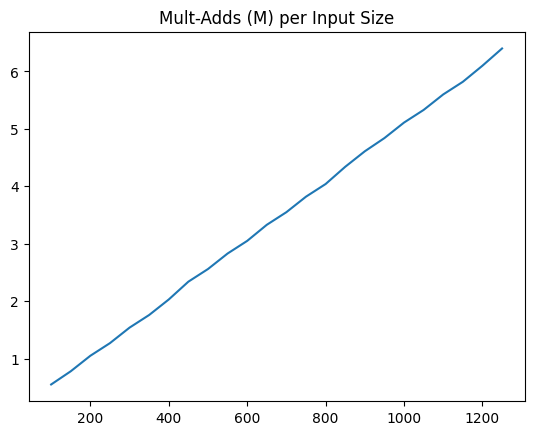

In [49]:
plt.plot(multadds.keys(), multadds.values())
t = f"Mult-Adds {modifier} per Input Size"
plt.title(t)
plt.savefig(t + '.png')
plt.show()

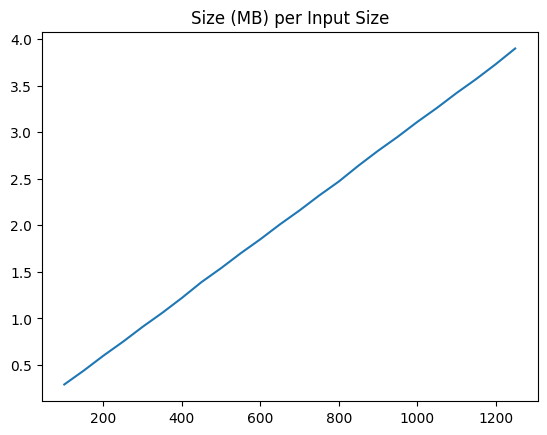

In [50]:
plt.plot(modelsize.keys(), modelsize.values())
t2 = f"Size {scalar} per Input Size"
plt.title(t2)
plt.savefig(t2 + '.png')
plt.show()

# Looking at how long our signal needs to be

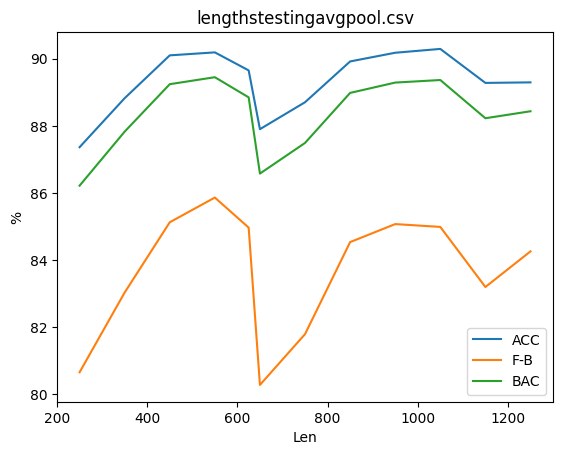

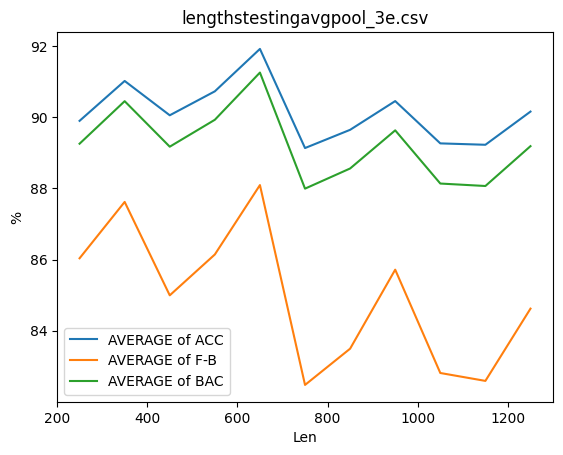

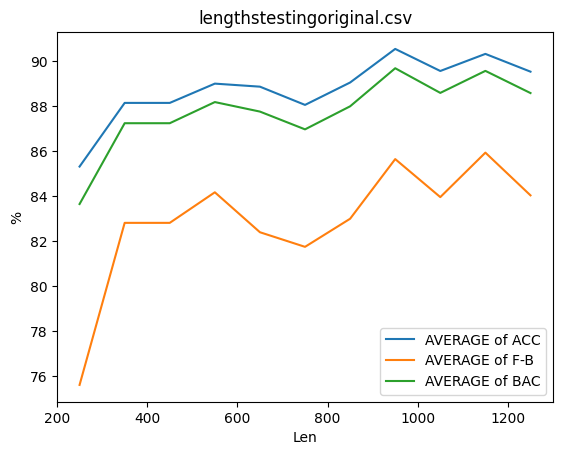

In [56]:
results_path = r'C:\Users\jodge\Documents\School\Summer24\tinymlcontest2022_demo_example\results'
results_name = 'lengthstestingavgpool.csv'
results_name_3e = 'lengthstestingavgpool_3e.csv'
results_name_og = 'lengthstestingoriginal.csv'

results_files = [results_name, results_name_3e, results_name_og]

for rf in results_files:
    rf_path = os.path.join(results_path, rf)
    df = pd.read_csv(rf_path, index_col = 'Length')
    df = df.iloc[:, 0:3].sort_index()
    df = df*100

    plt.plot(df)
    plt.legend(df.columns)
    plt.xlabel('Len')
    plt.ylabel('%')
    plt.title(rf)
    plt.show()

# why is this so strange? why does it dip around 750? is that some weird phase cancelling thing or something because the final connected output layers are 740 long after the conv layers?